In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


In [ ]:
url = 'https://raw.githubusercontent.com/Keerat-Grewal/KDD_Project/main/Correct_Dataset.csv'
url = 'https://raw.githubusercontent.com/Keerat-Grewal/KDD_Project/main/cardio_train.csv'
url = 'https://raw.githubusercontent.com/Keerat-Grewal/KDD_Project/main/heart.csv'
# df = pd.read_csv(url, sep=';')
df = pd.read_csv(url)
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.head()
df.corr()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slope,-0.030711,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877


In [ ]:
def my_train_test_split(X,y,test_frac=0.5):
  inxs = list(range(len(y)))
  n = len(inxs)
  nTest=int(test_frac*n)
  np.random.shuffle(inxs)
  X = X.iloc[inxs,:]
  y = y.iloc[inxs]
  Xtrain,ytrain,Xtest,ytest = X[:n-nTest], y[:n-nTest], X[n-nTest:], y[n-nTest:]
  return np.asarray(Xtrain).astype(np.float32),np.asarray(ytrain).astype(np.float32),np.asarray(Xtest).astype(np.float32),np.asarray(ytest).astype(np.float32)
def clean_data(df):
  cols = list(df.columns)
  for col in cols:
    df = df[df[col] != "?"]
  return df

df = clean_data(df).astype(np.float32)
# dataY = df["Target"]
# dataX = df.drop(["Target"], axis=1)
dataY = df["target"]
dataX = df.drop(["target"], axis=1)
print(dataY)
dataX.head()
means = dataX.mean()
sds = dataX.std()
dataX = dataX.apply(lambda x: (x-means)/sds,axis=1)


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
298    0.0
299    0.0
300    0.0
301    0.0
302    0.0
Name: target, Length: 303, dtype: float32


In [ ]:
np.asarray(dataX).astype(np.float32)

array([[ 0.6798795 ,  1.9698625 ,  0.76269394, ..., -2.270823  ,
        -0.71324897, -2.1453238 ],
       [ 0.6798795 ,  1.0009204 , -0.09258471, ..., -2.270823  ,
        -0.71324897, -0.5120748 ],
       [-1.46599   ,  0.03197826, -0.09258471, ...,  0.9747401 ,
        -0.71324897, -0.5120748 ],
       ...,
       [ 0.6798795 , -0.9369638 ,  0.70567536, ..., -0.6480414 ,
         1.2425377 ,  1.1211741 ],
       [ 0.6798795 , -0.9369638 , -0.09258471, ..., -0.6480414 ,
         0.26464444,  1.1211741 ],
       [-1.46599   ,  0.03197826, -0.09258471, ..., -0.6480414 ,
         0.26464444, -0.5120748 ]], dtype=float32)

In [ ]:
Xtrain, ytrain, Xtest, ytest = my_train_test_split(dataX, dataY, test_frac=0.2)
input_shape = Xtrain[0].shape
input_shape

(12,)

In [ ]:
dataY.value_counts()

1.0    165
0.0    138
Name: target, dtype: int64

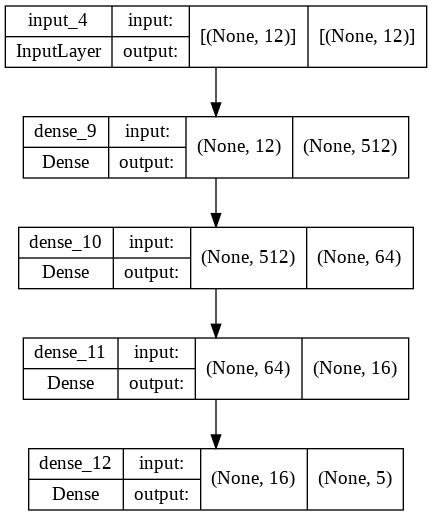

In [ ]:
input = layers.Input(shape=input_shape)
x = layers.Dense(512, activation="relu")(input)
x = layers.Dense(64)(x)
x = layers.Dense(16)(x)
outputs = layers.Dense(5)(x)
model = keras.Model(inputs=input, outputs=outputs, name="heart_disease_predictor")
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)
run_hist = model.fit(Xtrain, ytrain, batch_size=10, epochs=500, validation_split=0.2)

test_scores = model.evaluate(Xtest, ytest, verbose=2)
test_scores

Epoch 1/500
20/20 [==============================] - 1s 11ms/step - loss: 0.6211 - accuracy: 0.7887 - val_loss: 0.5163 - val_accuracy: 0.7959
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 0.3108 - accuracy: 0.8814 - val_loss: 0.6388 - val_accuracy: 0.7755
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.2566 - accuracy: 0.8969 - val_loss: 0.5202 - val_accuracy: 0.7959
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.2450 - accuracy: 0.8918 - val_loss: 0.5369 - val_accuracy: 0.8163
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.2315 - accuracy: 0.9072 - val_loss: 0.7633 - val_accuracy: 0.7959
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1883 - accuracy: 0.9227 - val_loss: 0.6832 - val_accuracy: 0.8163
Epoch 7/500
20/20 [==============================] - 0s 3ms/step - loss: 0.1694 - accuracy: 0.9227 - val_loss: 0.6895 - val_accuracy: 0.8163
Epoch 8/500


[3.09287428855896, 0.7833333611488342]

In [ ]:
def activation(net):
    return 1/(1+np.exp(-net))

def train(X,t,nepochs=200,n=0.5,test_size=0.3,val_size=0.3,seed=0):
    X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=test_size,random_state=seed)
    X_train2, X_val, t_train2, t_val = train_test_split(X_train, t_train, test_size=val_size,random_state=seed)

    train_accuracy = []
    val_accuracy = []
    nfeatures = X.shape[1]
    np.random.seed(seed)
    w = 2*np.random.uniform(size=(nfeatures,)) - 1
    
    for epoch in range(nepochs):
        y_train2 = X_train2.apply(lambda x: activation(np.dot(w,x)),axis=1)
        y_val = X_val.apply(lambda x: activation(np.dot(w,x)),axis=1)

        train_accuracy.append(sum(t_train2 == np.round(y_train2))/len(t_train2))
        val_accuracy.append(sum(t_val == np.round(y_val))/len(t_val))
                
        for j in range(len(w)):
            w[j] -= n*np.dot((y_train2 - t_train2)*y_train2*(1-y_train2),X_train2.iloc[:,j])
            
    results = pd.DataFrame({"epoch": np.arange(nepochs)+1, 'train_accuracy':train_accuracy,'val_accuracy':val_accuracy,
                            "n":n,'test_size':test_size,'val_size':val_size,'seed':seed
                           }).set_index(['n','test_size','val_size','seed'])
    return w,X_test,t_test,results

In [ ]:
def evaluate_baseline(t_test,t_train2,t_val):
    frac_max_class = t_train2.value_counts()[t_train2.mode()][0]/t_train2.size
    accuracy_test = t_test.value_counts()[t_test.mode()][0]/t_test.size
    accuracy_train2 = t_train2.value_counts()[t_train2.mode()][0]/t_train2.size
    accuracy_val = t_val.value_counts()[t_val.mode()][0]/t_val.size
    
    return frac_max_class,accuracy_test,accuracy_train2,accuracy_val

In [ ]:
def predict(w,X,threshold=0.5):
    y = []
    inx = []
    n = len(X)
    for j in X.index:
        x = X.loc[j]
        gx = x.dot(w)
        fx = activation(gx)
        if(fx > threshold):
            y.append(1)
        else:
            y.append(0)
        inx.append(j)
    return pd.Series(y, index=inx)

In [ ]:
ns = [1]
results = None
X_test = {}
t_test = {}
w = {}
for n in ns:
    w[n],X_test[n],t_test[n],results1 = train(dataX,dataY,n=n)
    if results is None:
        results = results1
    else:
        results = results.append(results1)
results

epoch  train_accuracy  val_accuracy
n test_size val_size seed                                     
1 0.3       0.3      0         1        0.202703      0.281250
                     0         2        0.878378      0.843750
                     0         3        0.878378      0.843750
                     0         4        0.885135      0.843750
                     0         5        0.885135      0.859375
...                          ...             ...           ...
                     0       196        0.905405      0.781250
                     0       197        0.905405      0.781250
                     0       198        0.905405      0.781250
                     0       199        0.905405      0.781250
                     0       200        0.905405      0.781250

[200 rows x 3 columns]

In [ ]:
results

epoch  train_accuracy  val_accuracy
n test_size val_size seed                                     
1 0.3       0.3      0         1        0.202703      0.281250
                     0         2        0.878378      0.843750
                     0         3        0.878378      0.843750
                     0         4        0.885135      0.843750
                     0         5        0.885135      0.859375
...                          ...             ...           ...
                     0       196        0.905405      0.781250
                     0       197        0.905405      0.781250
                     0       198        0.905405      0.781250
                     0       199        0.905405      0.781250
                     0       200        0.905405      0.781250

[200 rows x 3 columns]

In [ ]:
w

{1: array([-11.04806381,   8.05562723,  -4.05591706,  -0.414415  ,
         -1.05143568,  -4.41658209,   7.19133904,  -5.14133718,
         -5.48372323,   5.83189794,  -6.24657526,  -6.7539992 ])}

In [ ]:
dataY

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
298    0.0
299    0.0
300    0.0
301    0.0
302    0.0
Name: target, Length: 303, dtype: float32